In [68]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
def change_word(input_string: str, find_word: str, output_word: str):
    input_string = input_string.split(" ")
    list_word = []
    
    
    if len(input_string) > 1:
        input_string = " ".join(input_string)
        if input_string == find_word:
            input_string = output_word
        list_word.append(input_string)
    else:
        for i in input_string:
            if find_word == i:
                i = output_word
        else:
            i = i
        list_word.append(i)
    
    return " ".join(str(j) for j in list_word)

In [44]:
file = "LAPD_Calls_for_Service_2014.csv"
df = pd.read_csv(file)

In [45]:
test_df = df

In [46]:
test_df

,Incident Number,Reporting District,Area Occurred,Dispatch Date,Dispatch Time,Call Type Code,Call Type Description
0,140212004623,127,Central,02/12/2014,18:11:47,415W,WOMAN
1,140212004304,1385,Newton,02/12/2014,18:11:44,415G,GRP
2,140212004626,1307,Newton,02/12/2014,18:11:41,594O,OFCR HLDG
3,140212004685,2015,Olympic,02/12/2014,18:11:29,1101,NARCOTIC ACTIVITY
4,140212004668,1636,Foothill,02/12/2014,18:10:58,904A,AMB
...,...,...,...,...,...,...,...
932776,141231006434,396,Southwest,12/31/2014,23:58:36,507R,RADIO
932777,141231006436,679,Hollywood,12/31/2014,23:56:48,507P,PARTY
932778,141231006443,1974,Mission,12/31/2014,23:59:48,246H,HEARD ONLY
932779,141231006447,1235,77th Street,12/31/2014,23:58:02,245FX,SHOTS FIRED I/P


In [47]:
def clean_time(input_time):
    hour = input_time[:2]
    minute_second = input_time[2:]
    
    if int(hour) < 12:
        new_time = f"{input_time} AM"
    elif int(hour) == 12:
        new_time = f"{input_time} PM"
    elif int(hour) > 12:
        hour = int(hour) - 12
        new_time = f"{hour}{minute_second} PM"
        
    return new_time

In [48]:
test_df["Dispatch Time"] = test_df["Dispatch Time"].apply(clean_time)
test_df

,Incident Number,Reporting District,Area Occurred,Dispatch Date,Dispatch Time,Call Type Code,Call Type Description
0,140212004623,127,Central,02/12/2014,6:11:47 PM,415W,WOMAN
1,140212004304,1385,Newton,02/12/2014,6:11:44 PM,415G,GRP
2,140212004626,1307,Newton,02/12/2014,6:11:41 PM,594O,OFCR HLDG
3,140212004685,2015,Olympic,02/12/2014,6:11:29 PM,1101,NARCOTIC ACTIVITY
4,140212004668,1636,Foothill,02/12/2014,6:10:58 PM,904A,AMB
...,...,...,...,...,...,...,...
932776,141231006434,396,Southwest,12/31/2014,11:58:36 PM,507R,RADIO
932777,141231006436,679,Hollywood,12/31/2014,11:56:48 PM,507P,PARTY
932778,141231006443,1974,Mission,12/31/2014,11:59:48 PM,246H,HEARD ONLY
932779,141231006447,1235,77th Street,12/31/2014,11:58:02 PM,245FX,SHOTS FIRED I/P


In [62]:
plot1 = test_df.groupby(["Area Occurred"]).count()[["Call Type Description"]].reset_index()
plot1

,Area Occurred,Call Type Description
0,77th Street,61241
1,Central,38073
2,Devonshire,39895
3,Foothill,41688
4,Harbor,39503
5,Hollenbeck,37159
6,Hollywood,45841
7,Mission,53418
8,N Hollywood,51156
9,Newton,42116


In [63]:
x = plot1["Area Occurred"].tolist()
y = plot1["Call Type Description"].tolist()

<function matplotlib.pyplot.show(*args, **kw)>

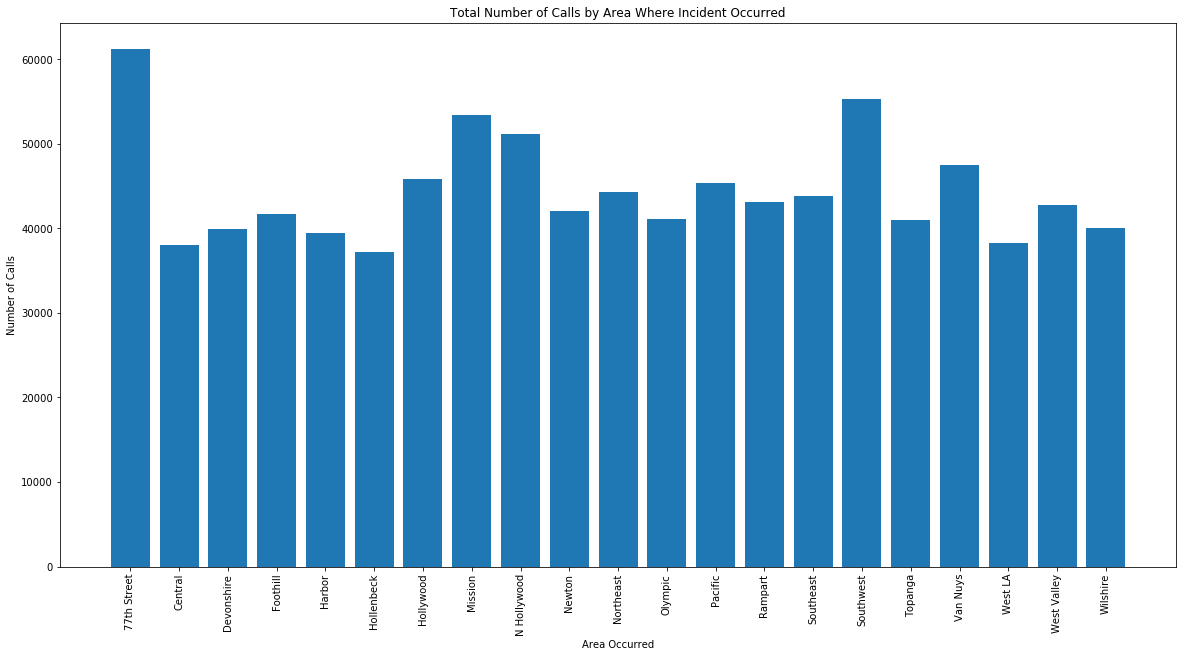

In [80]:
plt.figure(figsize = (20,10))
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.xlabel("Area Occurred")
plt.ylabel("Number of Calls")
plt.title("Total Number of Calls by Area Where Incident Occurred")
plt.show

In [81]:
test_df

,Incident Number,Reporting District,Area Occurred,Dispatch Date,Dispatch Time,Call Type Code,Call Type Description
0,140212004623,127,Central,02/12/2014,6:11:47 PM,415W,WOMAN
1,140212004304,1385,Newton,02/12/2014,6:11:44 PM,415G,GRP
2,140212004626,1307,Newton,02/12/2014,6:11:41 PM,594O,OFCR HLDG
3,140212004685,2015,Olympic,02/12/2014,6:11:29 PM,1101,NARCOTIC ACTIVITY
4,140212004668,1636,Foothill,02/12/2014,6:10:58 PM,904A,AMB
...,...,...,...,...,...,...,...
932776,141231006434,396,Southwest,12/31/2014,11:58:36 PM,507R,RADIO
932777,141231006436,679,Hollywood,12/31/2014,11:56:48 PM,507P,PARTY
932778,141231006443,1974,Mission,12/31/2014,11:59:48 PM,246H,HEARD ONLY
932779,141231006447,1235,77th Street,12/31/2014,11:58:02 PM,245FX,SHOTS FIRED I/P
